<a href="https://colab.research.google.com/github/engineerinvestor/Portfolio-Analysis/blob/main/Basic_Portfolio_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Portfolio Analysis Notebook

Name: Engineer Investor

Date: 05/19/2024

### Contact

Twitter: [@egr_investor](https://twitter.com/egr_investor)

GitHub: [engineerinvestor](https://github.com/engineerinvestor)

Email: egr.investor (gmail)

## Introduction

### Welcome to the Portfolio Analysis Tutorial!

Are you an investor looking to gain deeper insights into your portfolio's performance? Perhaps you're curious about how different assets contribute to your overall returns, or you want to simulate future performance to make more informed decisions. This tutorial is designed to help you achieve all that and more, even if you're not a programming expert.

In this tutorial, we'll guide you step-by-step through creating and using a Python-based portfolio analysis tool. You'll learn how to fetch financial data, calculate important performance metrics, visualize your portfolio's returns, and even run Monte Carlo simulations to forecast future performance.

**What You'll Learn:**

1. **Fetching Financial Data**: Use Python to download historical data for your favorite stocks.
2. **Calculating Performance Metrics**: Understand how to compute annual returns, volatility, Sharpe ratio, and more.
3. **Visualizing Performance**: Create beautiful plots to visualize both individual asset performance and the overall portfolio return.
4. **Monte Carlo Simulations**: Run simulations to predict how your portfolio might perform under different scenarios.

By the end of this tutorial, you'll have a powerful toolkit at your disposal, enabling you to analyze and visualize your investment portfolio with ease. Whether you're a seasoned investor or just getting started, this tutorial will provide valuable insights into the world of portfolio analysis.

Let's get started on your journey to becoming a more informed and confident investor!

## Install Required Packages

First, ensure you have the required packages installed. Run the following command in a Jupyter notebook cell:

In [31]:
!pip install pandas yfinance numpy matplotlib

## Import Necessary Libraries

Import the necessary libraries for our analysis.

In [32]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

## Define Portfolio

Define portfilio components and their respective weights, start and end dates, and the risk-free rate. A future improvement is to make the risk-free rate time-varying using the 3-month T-bill return data.

In [44]:
# Create a dictionary of tickers and weights
tickers = ['VTSMX', 'VGTSX', 'DFSVX', 'VBMFX']
weights = [0.3, 0.3, 0.2, 0.2]
portfolio = dict(zip(tickers, weights))
print('Portfolio:', portfolio)

# Define Start date and end data
start_date = '1997-01-01'
end_date = '2021-01-01'
print('Start Date:', start_date)
print('End Date  :', end_date)

# Define the risk-free rate:
risk_free_rate = 0.02
print('Risk-free Rate:', risk_free_rate)

Portfolio: {'VTSMX': 0.3, 'VGTSX': 0.3, 'DFSVX': 0.2, 'VBMFX': 0.2}
Start Date: 1997-01-01
End Date  : 2021-01-01
Risk-free Rate: 0.02


## DataLoader Class

Create a class to fetch and preprocess financial data.

In [34]:
class DataLoader:
    def __init__(self, tickers, start_date, end_date):
        self.tickers = tickers
        self.start_date = start_date
        self.end_date = end_date

    def fetch_data(self):
        data = yf.download(self.tickers, start=self.start_date, end=self.end_date)['Adj Close']
        return data

## PerformanceMetrics Class

Create a class to calculate various performance metrics.

In [35]:
class PerformanceMetrics:
    @staticmethod
    def calculate_annual_return(data):
        annual_return = data.resample('Y').last().pct_change().mean()
        return annual_return

    @staticmethod
    def calculate_annual_volatility(data):
        annual_volatility = data.pct_change().std() * (252 ** 0.5)
        return annual_volatility

    @staticmethod
    def calculate_sharpe_ratio(data, risk_free_rate=risk_free_rate):
        annual_return = PerformanceMetrics.calculate_annual_return(data)
        annual_volatility = PerformanceMetrics.calculate_annual_volatility(data)
        sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility
        return sharpe_ratio

    @staticmethod
    def calculate_max_drawdown(data):
        cumulative_returns = (1 + data.pct_change()).cumprod()
        peak = cumulative_returns.expanding(min_periods=1).max()
        drawdown = (cumulative_returns / peak) - 1
        max_drawdown = drawdown.min()
        return max_drawdown

    @staticmethod
    def calculate_sortino_ratio(data, risk_free_rate=risk_free_rate):
        returns = data.pct_change().dropna()
        downside_deviation = returns[returns < 0].std() * (252 ** 0.5)
        annual_return = PerformanceMetrics.calculate_annual_return(data)
        sortino_ratio = (annual_return - risk_free_rate) / downside_deviation
        return sortino_ratio

    @staticmethod
    def calculate_var(data, confidence_level=0.95):
        returns = data.pct_change().dropna()
        var = np.percentile(returns, (1 - confidence_level) * 100)
        return var

## PortfolioAnalysis Class

Create a class to perform portfolio analysis.

In [36]:
class PortfolioAnalysis:
    def __init__(self, data, weights):
        self.data = data
        self.weights = np.array(weights)

        assert len(weights) == len(data.columns), "Weights must be the same length as the number of columns in the data"
        assert sum(weights) == 1, "Weights must sum to 1"

    def calculate_portfolio_return(self):
        returns = self.data.pct_change().mean()
        portfolio_return = np.dot(self.weights, returns) * 252
        return portfolio_return

    def calculate_portfolio_volatility(self):
        returns = self.data.pct_change()
        covariance_matrix = returns.cov() * 252
        portfolio_volatility = np.sqrt(np.dot(self.weights.T, np.dot(covariance_matrix, self.weights)))
        return portfolio_volatility

    def calculate_portfolio_sharpe_ratio(self, risk_free_rate=risk_free_rate):
        portfolio_return = self.calculate_portfolio_return()
        portfolio_volatility = self.calculate_portfolio_volatility()
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
        return sharpe_ratio

## PortfolioVisualization Class

Create a class to visualize portfolio performance, including plotting the total portfolio return over time.

In [37]:
class PortfolioVisualization:
    @staticmethod
    def plot_performance(data):
        cumulative_returns = (1 + data.pct_change()).cumprod()
        cumulative_returns.plot(figsize=(10, 6))
        plt.title('Portfolio Component Cumulative Returns')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Returns')
        plt.grid(True)
        plt.show()

    @staticmethod
    def plot_portfolio_return(data, weights):
        returns = data.pct_change().dropna()
        weighted_returns = returns.dot(weights)
        cumulative_portfolio_returns = (1 + weighted_returns).cumprod()
        cumulative_portfolio_returns.plot(figsize=(10, 6))
        plt.title('Total Portfolio Cumulative Return')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Returns')
        plt.grid(True)
        plt.show()

## Example Usage: Compute Portfolio Returns

Now, let's use the classes we've created to analyze a sample portfolio.

In [38]:
# Load data
data_loader = DataLoader(tickers, start_date, end_date)
data = data_loader.fetch_data()

# Calculate performance metrics
annual_return = PerformanceMetrics.calculate_annual_return(data)
annual_volatility = PerformanceMetrics.calculate_annual_volatility(data)
sharpe_ratio = PerformanceMetrics.calculate_sharpe_ratio(data)
max_drawdown = PerformanceMetrics.calculate_max_drawdown(data)
sortino_ratio = PerformanceMetrics.calculate_sortino_ratio(data)
var = PerformanceMetrics.calculate_var(data)

print('\n********** Individual Ticker Stats **********')
print("\nAnnual Return (%):", np.round(100*annual_return, 2))
print("\nAnnual Volatility (%):", np.round(100*annual_volatility, 2))
print("\nSharpe Ratio:", np.round(sharpe_ratio, 2))
print("\nMax Drawdown (%):", np.round(100*max_drawdown, 2))
print("\nSortino Ratio:", np.round(sortino_ratio, 2))
print("\nValue at Risk (VaR):", np.round(var, 2))

# Perform portfolio analysis
portfolio_analysis = PortfolioAnalysis(data, weights)
portfolio_return = portfolio_analysis.calculate_portfolio_return()
portfolio_volatility = portfolio_analysis.calculate_portfolio_volatility()
portfolio_sharpe_ratio = portfolio_analysis.calculate_portfolio_sharpe_ratio()

print('\n********** Portfolio Return Stats **********')
print("Portfolio Return (%):", np.round(100*portfolio_return, 2))
print("Portfolio Volatility (%):", np.round(100*portfolio_volatility, 2))
print("Portfolio Sharpe Ratio:", np.round(portfolio_sharpe_ratio, 2))

[*********************100%%**********************]  4 of 4 completed



********** Individual Ticker Stats **********

Annual Return (%): Ticker
DFSVX    10.99
VBMFX     4.91
VGTSX     7.82
VTSMX     9.88
dtype: float64

Annual Volatility (%): Ticker
DFSVX    23.31
VBMFX     4.07
VGTSX    19.38
VTSMX    19.91
dtype: float64

Sharpe Ratio: Ticker
DFSVX    0.39
VBMFX    0.72
VGTSX    0.30
VTSMX    0.40
dtype: float64

Max Drawdown (%): Ticker
DFSVX   -66.70
VBMFX    -6.53
VGTSX   -61.48
VTSMX   -55.38
dtype: float64

Sortino Ratio: Ticker
DFSVX    0.50
VBMFX    1.16
VGTSX    0.38
VTSMX    0.50
dtype: float64

Value at Risk (VaR): -0.02

********** Portfolio Return Stats **********
Portfolio Return (%): 8.71
Portfolio Volatility (%): 13.6
Portfolio Sharpe Ratio: 0.49


## Visualize Portfolio Performance

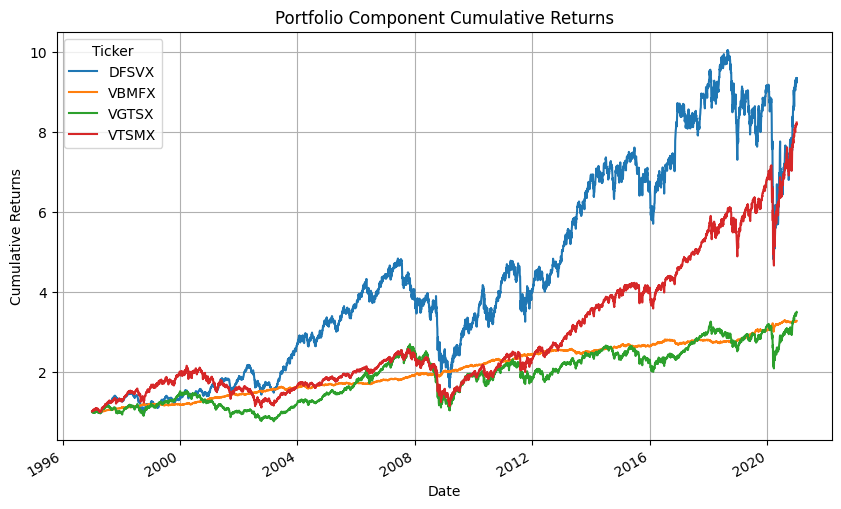

In [39]:
# Visualize portfolio performance
PortfolioVisualization.plot_performance(data)

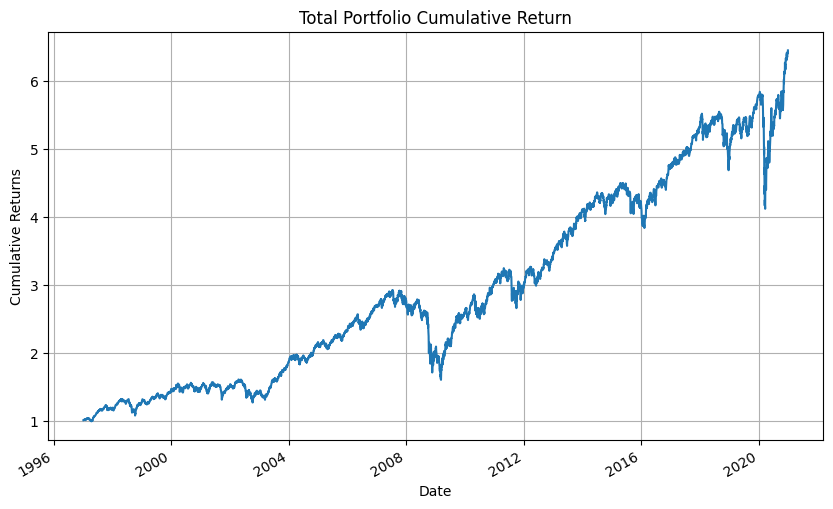

In [40]:
# Visualize total portfolio return
PortfolioVisualization.plot_portfolio_return(data, weights)

## Monte Carlo Simulation (In-progress - TBD)

Needs minor debugging.



### MonteCarloSimulation Class

Create a class to perform Monte Carlo simulations.

In [41]:
class MonteCarloSimulation:
    def __init__(self, data, num_simulations, time_horizon, initial_investment=10000):
        self.data = data
        self.num_simulations = num_simulations
        self.time_horizon = time_horizon
        self.initial_investment = initial_investment

    def simulate(self):
        returns = self.data.pct_change().dropna()
        mean_returns = returns.mean()
        cov_matrix = returns.cov()

        results = np.zeros((self.num_simulations, self.time_horizon))
        for i in range(self.num_simulations):
            sim_returns = np.random.multivariate_normal(mean_returns, cov_matrix, self.time_horizon)
            sim_cum_returns = (1 + pd.DataFrame(sim_returns)).cumprod()
            results[i, :] = sim_cum_returns.iloc[-1, :] * self.initial_investment * np.ones(self.time_horizon)

        return results

    def plot_simulation(self):
        results = self.simulate()
        plt.figure(figsize=(10, 6))
        plt.plot(results.T)
        plt.title('Monte Carlo Simulation of Portfolio Performance')
        plt.xlabel('Days')
        plt.ylabel('Portfolio Value')
        plt.grid(True)
        plt.show()

### Run Monte Carlo Simulation

Uncomment to debug.

In [42]:
# # Monte Carlo simulation
# mc_sim = MonteCarloSimulation(data, num_simulations=1000, time_horizon=252)
# mc_sim.plot_simulation()

## Next Steps

In this tutorial, we've laid the groundwork for a powerful portfolio analysis tool. Moving forward, we plan to simplify the user interface to make it even more accessible for less technical users. We'll also be adding new features and building out the code base, including comprehensive unit testing to ensure reliability.

We're excited to invite members of the #FinTwit and finance community to contribute to this open-source project. Your insights and expertise can help us enhance this tool, making it a valuable resource for investors everywhere. Let's work together to create something truly impactful!

## Conclusion

This notebook will guide less technical investors through the process of loading financial data, calculating key performance metrics, visualizing both individual asset and total portfolio performance, and running Monte Carlo simulations. By following these steps, you can perform comprehensive portfolio analysis in Python. Feel free to reach out and share your feedback or submit pull requests for improvements!